In [1]:
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pylab as plt

In [12]:
matplotlib.rc('figure', figsize=(15, 10))

In [5]:
#each of the 3IFS runs (2.8km.4km,9km) is stored in one zarr
ds_ifs = xr.open_zarr('/work/bm1235/a270046/cycle2-sync/ddh_output/4km')

In [6]:
# ds_icon = xr.open_zarr('/work/bm1235/k203123/experiments/ngc2009/outdata/ngc2009_mtgrm.zarr')

Let's use IFS for now...

In [7]:
ds = ds_ifs

# Introduction

In [8]:
# we use only levels above MIN_LEVEL, this as the range more or less close to surface, where the log wind profile applies
MIN_LEVEL = 125 # for IFS

In [9]:
wind_speed = (ds.v**2 + ds.u**2)**0.5

Wind speeds decrease with increasing level. A higher level is closer to surface.

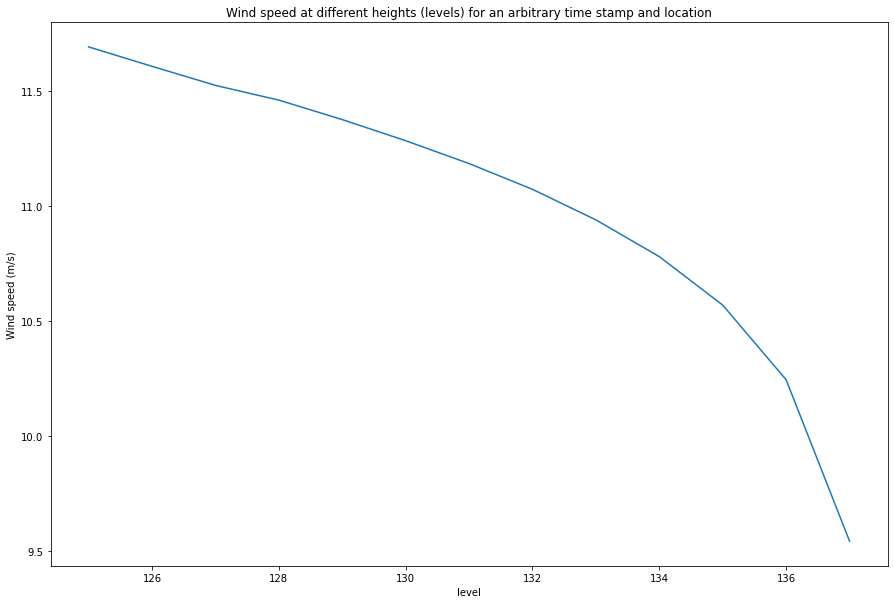

In [13]:
wind_speed_example = wind_speed.sel(level=slice(MIN_LEVEL, None)).isel(station=10, time=230)
wind_speed_example.plot()
plt.title('Wind speed at different heights (levels) for an arbitrary time stamp and location')
plt.ylabel('Wind speed (m/s)');

In the next step we will try to find an estimation for the height above surface for each level using the air pressure at each level, location and time.

In [14]:
R = 287  # gas constant for dry air
g = 9.81

In [15]:
air_pressure_at_surface = ds.p.isel(level=-1)

In [16]:
height = R * ds.t * np.log(air_pressure_at_surface / ds.p) / g
height = height.sel(level=slice(MIN_LEVEL, None))

Mapping between level and height above surface:

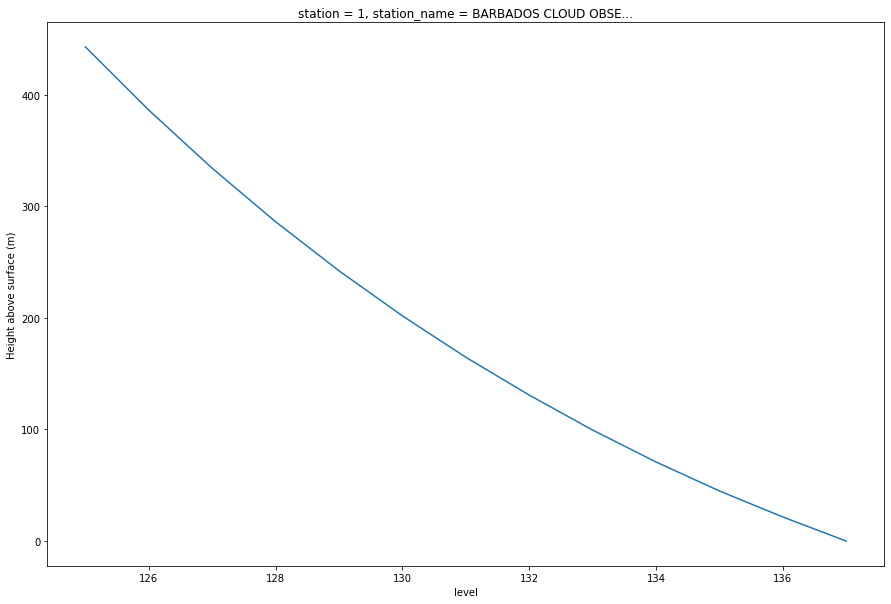

In [17]:
height.isel(time=0, station=0).plot()
plt.ylabel('Height above surface (m)');

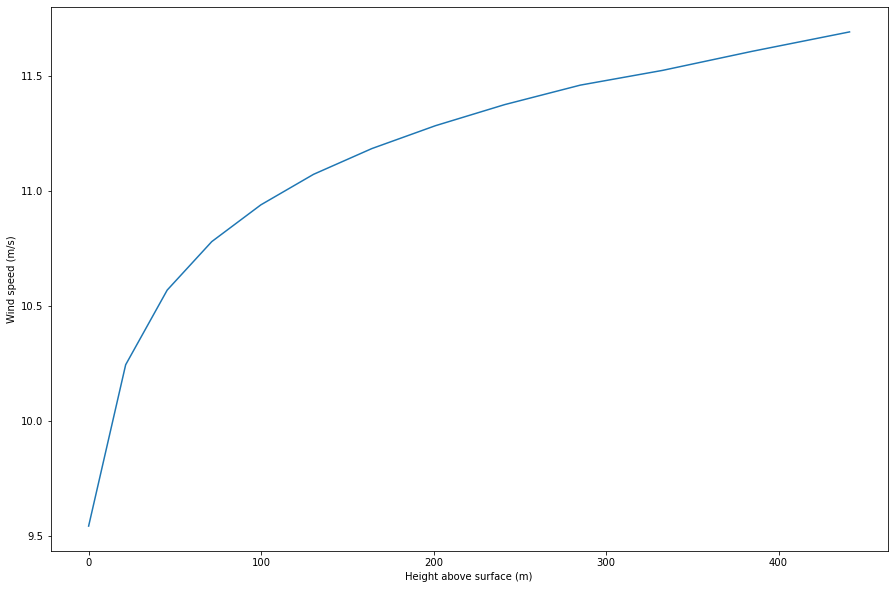

In [18]:
plt.plot(height.sel(time=wind_speed_example.time, station=wind_speed_example.station), wind_speed_example)
plt.ylabel('Wind speed (m/s)')
plt.xlabel('Height above surface (m)');

# Do levels depend on time or station? 

At some stations, there is a difference of up to 80m at level=125 between time stamps.

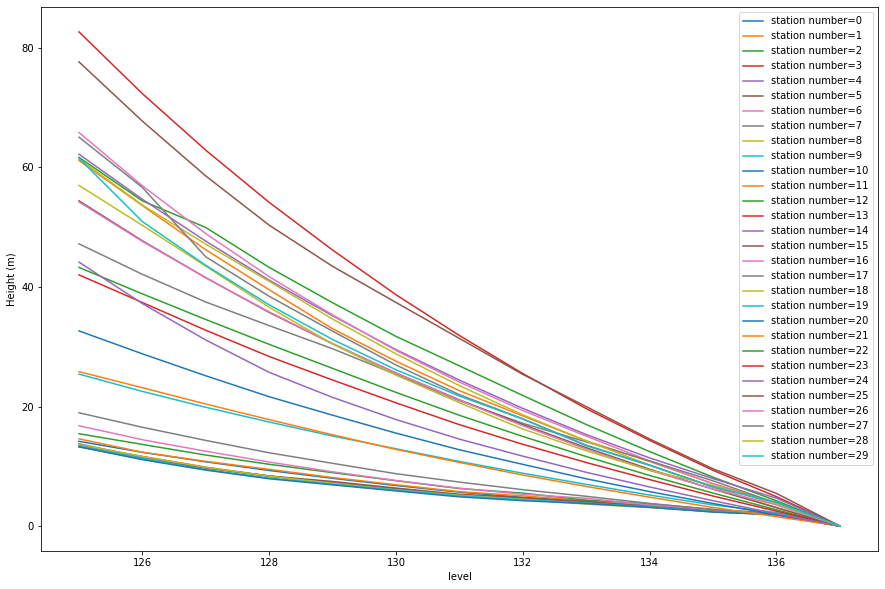

In [19]:
for i in range(30):
    (height.isel(station=i).max(dim='time') - height.isel(station=i).min(dim='time')).plot(label=f"station number={i}")
plt.title("")
plt.ylabel('Height (m)')
plt.legend();

So it levels vary a lot in height along the time axis... (maybe due to varying pressure)

# Mapping between levels and presure

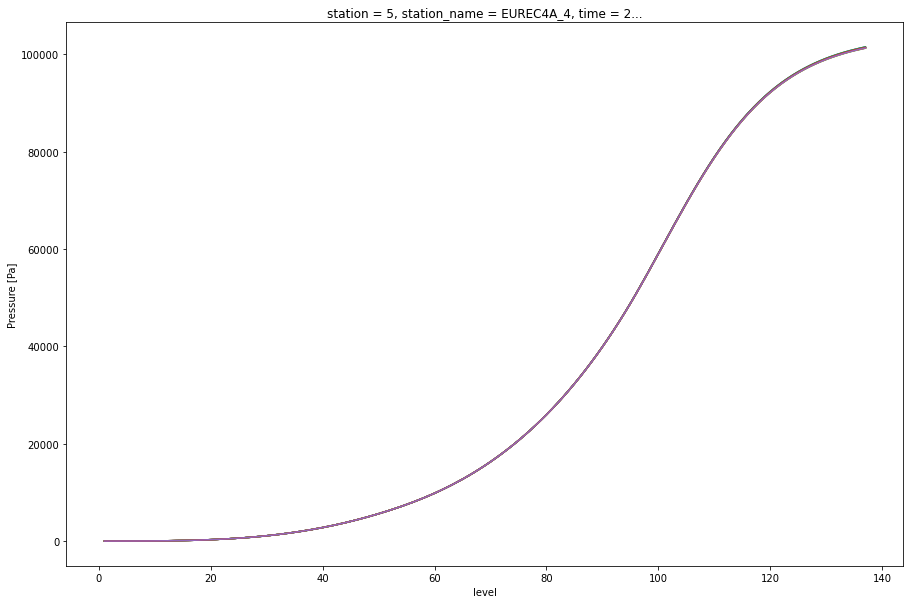

In [ ]:
for s in range(5):
    a = ds.p.isel(station=s, time=[1, 100, 1000])
    for t in range(3):
        a.isel(time=t).plot()